In [2]:
# creating simple tensors
import torch
import numpy as np

np.set_printoptions(precision=3)

a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [3]:
t_ones = torch.ones(2, 3)
t_ones.shape
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [4]:
randr_tensor = torch.rand(2, 3)
print(randr_tensor)

tensor([[0.7660, 0.0355, 0.0012],
        [0.0152, 0.9967, 0.5748]])


In [5]:
# change data type to a desired type
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [6]:
# transpose a tensor
t = torch.rand(3, 5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [7]:
# reshape from 1 to 2-D array
t = torch.zeros(30)
t_reshape = t.reshape(5, 6)
print(t_reshape.shape)

torch.Size([5, 6])


In [8]:
# remove unnecessary dimensions
t = torch.zeros(1, 2, 1, 4, 1)
t_sqz = torch.squeeze(t, 2)
print(t.shape, '-->', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


In [9]:
# create 2 random tensors

torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal( mean=0, std=1, size=(5, 2))

In [10]:
# compute element wise product
t3 = torch.multiply( t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [11]:
# calculate mean of each column in t1
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [12]:
# matrix-matrix product 

t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [13]:
# perform m-m by transposing first matrix
t6 = torch.matmul( torch.transpose(t1, 0, 1), t2)
print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [14]:
# compute normal of a tensor
norm_t1 = torch.linalg.norm( t1, ord=2, dim=1)
print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [15]:
# provide number of splits for splitting tensor

torch.manual_seed(1)

t = torch.rand(6)

print(t)

t_splits = torch.chunk( t, 3)
[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [16]:
# provide size of the different splits
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])

[ item.numpy() for item in t_splits]

tensor([0.3971, 0.7544, 0.5695, 0.4388, 0.6387])


[array([0.397, 0.754, 0.57 ], dtype=float32),
 array([0.439, 0.639], dtype=float32)]

In [17]:
# concatenate 2 tensors into one
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A, B], axis=0)

print(C)

tensor([1., 1., 1., 0., 0.])


In [18]:
# stack 2 tensors

A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


In [20]:
# use pytorch data loader to create a dataset

from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)

data_loader = DataLoader(t)

In [21]:
# iterate through data
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [22]:
# create batches for dataset

data_loader = DataLoader( t, batch_size=3, drop_last=False)

for i, batch in enumerate( data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


In [23]:
# create tensors for features and labels
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

In [24]:
# create joint dataset from two previous tensors
from torch.utils.data import Dataset

class JointDataset( Dataset ):
    
    def __init__(self, x, y):

        self.x = x
        self.y = y

    def __len__(self):
        return len( self.x )
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [25]:
# join dataset
joint_dataset = JointDataset(t_x, t_y)

In [26]:
# print example in joint
for example in joint_dataset:
    print('   x: ', example[0], '  y: ', example[1])

   x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
   x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
   x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
   x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


In [27]:
# create shuffled version of joint dataset
torch.manual_seed(1)
data_loader = DataLoader( dataset=joint_dataset, batch_size=2, shuffle=True)


In [28]:
# iterate through data loader by entry
for i, batch in enumerate( data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])

batch 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
         y: tensor([2, 0])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])


In [29]:
# iterate over the number of epochs
for epoch in range(2):

    print(f'epoch {epoch+1}')

    for i, batch in enumerate( data_loader, 1):

        print(f'batch {i}:', 'x:', batch[0], '\n         y:', batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
         y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
         y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
         y: tensor([0, 1])


In [31]:
# generate list of files to analyze on computer
import pathlib

imgdir_path = pathlib.Path( 'cat_dog_images' )
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


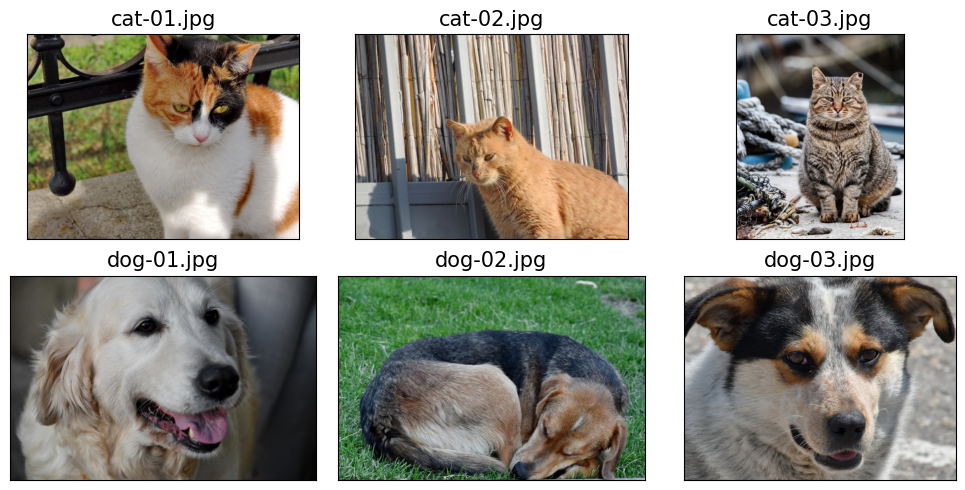

In [32]:
# visualize images using matplotlib
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure( figsize=(10,5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape )
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

In [33]:
# extract labels from filenames. 1 dog, 0 cat

labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]

print(labels)

[0, 0, 0, 1, 1, 1]


In [36]:
# join dataset of features and labels
class ImageDataset(Dataset):
    
    def __init__(self, file_list, labels):

        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        
        file = self.file_list[index]
        label = self.labels[index]
        return file, label
    
    def __len__(self):
        return len(self.labels)

In [37]:
image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images\cat-01.jpg 0
cat_dog_images\cat-02.jpg 0
cat_dog_images\cat-03.jpg 0
cat_dog_images\dog-01.jpg 1
cat_dog_images\dog-02.jpg 1
cat_dog_images\dog-03.jpg 1


In [38]:
# load image content, decode raw content, resize to desired size

import torchvision.transforms as transforms

img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width))
])

In [62]:
# update imagedataset class which transform we just defined

import torchvision.transforms as transforms

class ImageDataset(Dataset):

    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform

    def __getitem__(self, index):

        img = Image.open(self.file_list[index])   

        if self.transform is not None:
            img = self.transform(img)

        label = self.labels[index]

        return img, label
    
    def __len__(self):
        
        return len(self.labels)

img_height, img_width = 80, 120
    
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])
    
image_dataset = ImageDataset(file_list, labels, transform)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


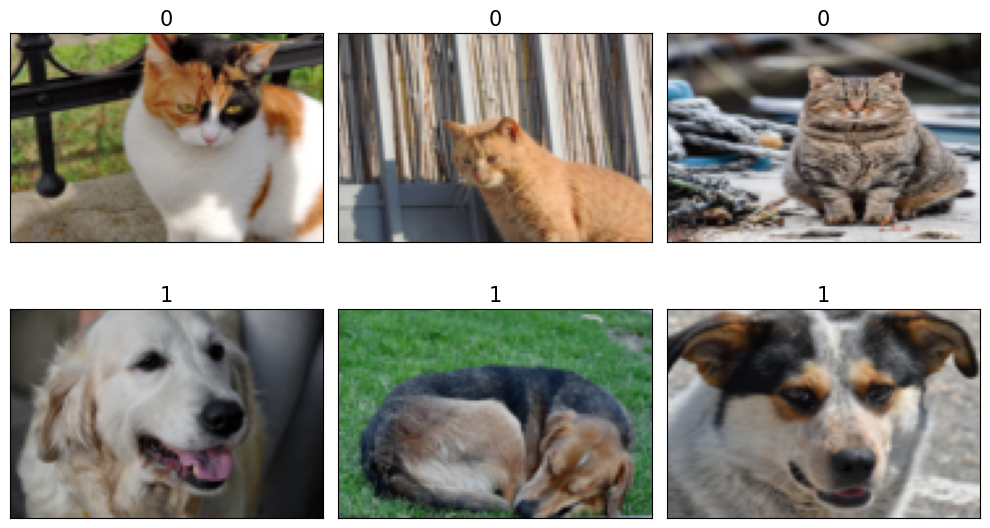

In [65]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0].numpy().transpose((1, 2, 0)))
    ax.set_title(f'{example[1]}', size=15)
    
plt.tight_layout()
plt.show()

In [67]:
# Download and store CelebA dataset

import torchvision

image_path = './'

celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=True)

Downloading...
From (original): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
From (redirected): https://drive.usercontent.google.com/download?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=t&uuid=a1c8855d-ebf8-4786-aa31-0df769f32714
To: c:\Users\Andrew Solis\Projects\machine-learning-book\ch12\celeba\img_align_celeba.zip
100%|██████████| 1.44G/1.44G [01:21<00:00, 17.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pblRyaVFSWGxPY0U
To: c:\Users\Andrew Solis\Projects\machine-learning-book\ch12\celeba\list_attr_celeba.txt
100%|██████████| 26.7M/26.7M [00:02<00:00, 11.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS
To: c:\Users\Andrew Solis\Projects\machine-learning-book\ch12\celeba\identity_CelebA.txt
100%|██████████| 3.42M/3.42M [00:00<00:00, 5.00MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pbThiMVRxWXZ4dU0
To: c:\Users\Andrew Solis\Projects\machine-learning-book\ch12\celeba\list_bbox_cele

In [68]:
assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [69]:
# take a look at examples of data
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x1F0D0DD16D0>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


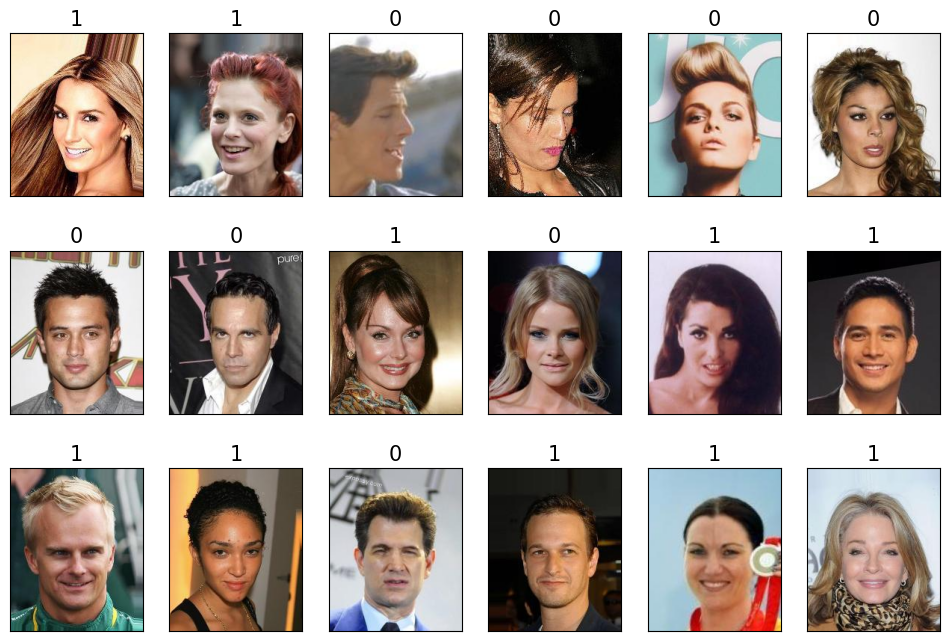

In [70]:
# visualize first 18 examples
from itertools import islice

fig = plt.figure(figsize=(12, 8))

for i, (image, attributes) in islice( enumerate( celeba_dataset ), 18 ):
    ax = fig.add_subplot( 3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)

plt.show()